## FINE-TUNE BẰNG PYTORCH

### FINE-TUNE YOLOV8 VỚI DỮ LIỆU YOLO FORMAT

In [ ]:
from ultralytics import YOLO

model = YOLO('/kaggle/working/yolov8n.pt')  # load backbone+head pretrained COCO

model.train(
    data='/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml',
    imgsz=640,
    epochs=20,
    batch=16,
    lr0=0.01,
    mosaic=1.0,
    device=0
)

model.val()
model.export(format='torchscript')  # tuỳ chọn: onnx, tflite, openvino...

Ultralytics 8.3.209 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

'/kaggle/working/runs/detect/train2/weights/best.torchscript'

In [ ]:
# Test trên tập test
import os
import glob

# Load trained model (sử dụng best weights)
best_model_path = 'runs/detect/train/weights/best.pt'
if os.path.exists(best_model_path):
    trained_model = YOLO(best_model_path)
    print(f"Loaded trained model from: {best_model_path}")
else:
    trained_model = model
    print("Using current model")

# Evaluate trên test set
print("Evaluating on test set...")
test_results = trained_model.val(
    data='/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml',
    split='test',
    save_json=True
)

print(f"Test mAP50: {test_results.box.map50:.4f}")
print(f"Test mAP50-95: {test_results.box.map:.4f}")

Using current model
Evaluating on test set...
Ultralytics 8.3.209 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7.7±3.0 MB/s, size: 38.2 KB)
val: Scanning /kaggle/input/one-tu-ti-yolo/oan_tu_ti/test/labels... 304 images, 118 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 304/304 226.8it/s 1.3s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/one-tu-ti-yolo/oan_tu_ti/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 5.1it/s 3.7s0.1s
                   all        304        204      0.911       0.91      0.942      0.755
                 Paper         72         72      0.911      0.889      0.917      0.676
                  Rock         59         65      0.937      0.917      0.951      0.781
              Scissors         66         67      0.886      0.924      0.957       0.81
Speed: 1.4ms preprocess, 4.1ms inference,

Testing on 3 images
Testing image 1: IMG_7043_MOV-18_jpg.rf.a49776cf1eaf613d8f852b143e85caec.jpg

image 1/1 /kaggle/input/one-tu-ti-yolo/oan_tu_ti/test/images/IMG_7043_MOV-18_jpg.rf.a49776cf1eaf613d8f852b143e85caec.jpg: 640x640 1 Scissors, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
  Detected 1 objects:
    Scissors: 0.968
Testing image 2: Screen-Recording-2023-03-11-at-9_48_18-PM_mov-94_jpg.rf.b4fdf88bf5a54c48db4f4faa91dda1b4.jpg

image 1/1 /kaggle/input/one-tu-ti-yolo/oan_tu_ti/test/images/Screen-Recording-2023-03-11-at-9_48_18-PM_mov-94_jpg.rf.b4fdf88bf5a54c48db4f4faa91dda1b4.jpg: 640x640 (no detections), 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
  No objects detected
Testing image 3: IMG_7043_MOV-107_jpg.rf.b19f7859f30f08a85fdd015b594e750d.jpg

image 1/1 /kaggle/input/one-tu-ti-yolo/oan_tu_ti/test/images/IMG_7043_MOV-107_jpg.rf.b19f7859f30f08a85fdd015b594e750d.jpg:

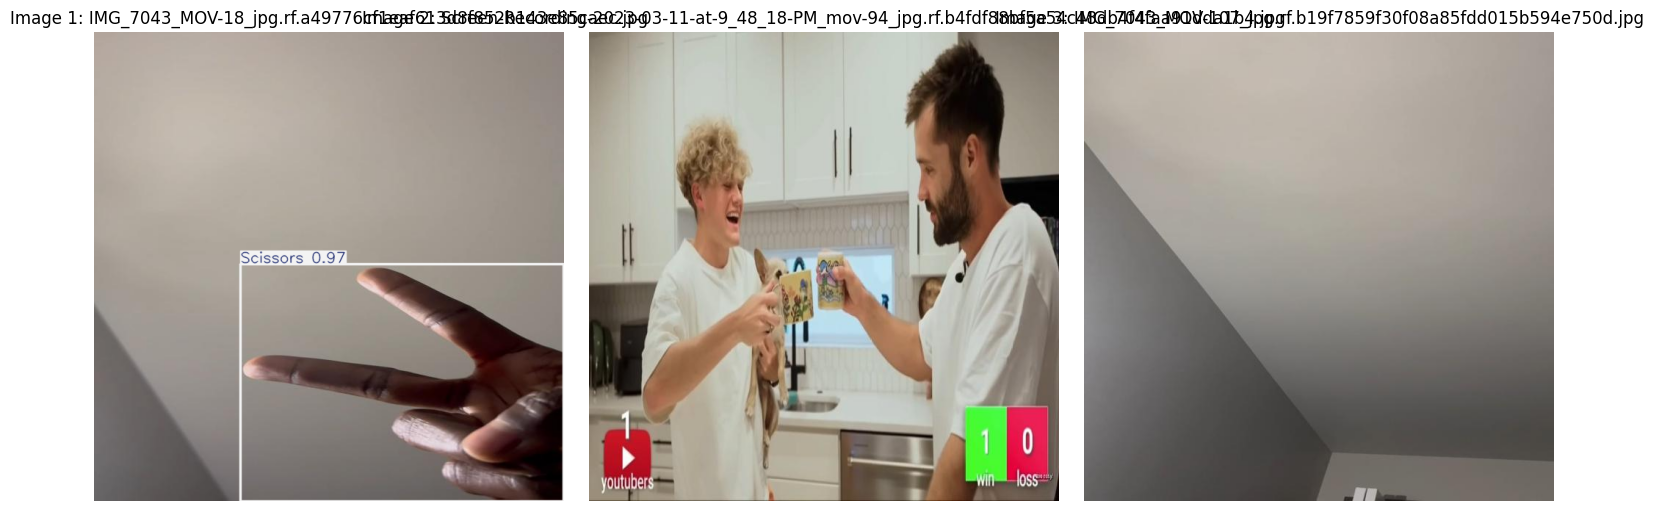

In [ ]:
# Test inference trên một vài ảnh cụ thể
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Tìm ảnh test để thử
test_image_dir = '/kaggle/input/one-tu-ti-yolo/oan_tu_ti/test/images'

# Lấy 3 ảnh đầu tiên để test
test_images = glob.glob(os.path.join(test_image_dir, '*.jpg'))[:3]
if not test_images:
    test_images = glob.glob(os.path.join(test_image_dir, '*.png'))[:3]

print(f"Testing on {len(test_images)} images")

# Tạo subplot để hiển thị kết quả
fig, axes = plt.subplots(1, len(test_images), figsize=(15, 5))
if len(test_images) == 1:
    axes = [axes]

# Inference và hiển thị kết quả
for i, img_path in enumerate(test_images):
    print(f"Testing image {i+1}: {os.path.basename(img_path)}")

    # Run inference
    results = trained_model(img_path, conf=0.5)
    result = results[0]

    # In thông tin detections
    if len(result.boxes) > 0:
        print(f"  Detected {len(result.boxes)} objects:")
        for j, box in enumerate(result.boxes):
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])
            class_name = trained_model.names[class_id]
            print(f"    {class_name}: {confidence:.3f}")
    else:
        print("  No objects detected")

    # Hiển thị ảnh với annotation
    annotated_img = result.plot()
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(annotated_img_rgb)
    axes[i].set_title(f'Image {i+1}: {os.path.basename(img_path)}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 5.1.1 So sánh các cấu hình YOLOv8

In [ ]:
# Thí nghiệm 1: YOLOv8n với mosaic tắt (mosaic=0)
print("=== Thí nghiệm 1: YOLOv8n với mosaic=0 ===")

model_mosaic_off = YOLO('yolov8n.pt')
results_mosaic_off = model_mosaic_off.train(
    data='/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml',
    imgsz=640,
    epochs=20,
    batch=16,
    lr0=0.01,
    mosaic=0.0,  # Tắt mosaic
    device=0,
    name='yolov8n_mosaic_off'
)

val_results_mosaic_off = model_mosaic_off.val()
print(f"YOLOv8n (mosaic=0) - mAP50-95: {val_results_mosaic_off.box.map:.4f}")

=== Thí nghiệm 1: YOLOv8n với mosaic=0 ===
Ultralytics 8.3.209 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=yolov8n_mosaic_off, nbs=64, nms=False, opset=None, optimize=False, optimizer=a

In [ ]:
# Thí nghiệm 2: YOLOv8n với image size 512
print("=== Thí nghiệm 2: YOLOv8n với imgsz=512 ===")

model_512 = YOLO('yolov8n.pt')
results_512 = model_512.train(
    data='/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml',
    imgsz=512,  # Image size 512
    epochs=20,
    batch=16,
    lr0=0.01,
    mosaic=1.0,
    device=0,
    name='yolov8n_imgsz512'
)

val_results_512 = model_512.val()
print(f"YOLOv8n (imgsz=512) - mAP50-95: {val_results_512.box.map:.4f}")

=== Thí nghiệm 2: YOLOv8n với imgsz=512 ===
Ultralytics 8.3.209 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_imgsz512, nbs=64, nms=False, opset=None, optimize=False, optimizer=au

In [ ]:
# Thí nghiệm 3: YOLOv8n với image size 768
print("=== Thí nghiệm 3: YOLOv8n với imgsz=768 ===")

model_768 = YOLO('yolov8n.pt')
results_768 = model_768.train(
    data='/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml',
    imgsz=768,  # Image size 768
    epochs=20,
    batch=8,    # Giảm batch size do image lớn hơn
    lr0=0.01,
    mosaic=1.0,
    device=0,
    name='yolov8n_imgsz768'
)

val_results_768 = model_768.val()
print(f"YOLOv8n (imgsz=768) - mAP50-95: {val_results_768.box.map:.4f}")

=== Thí nghiệm 3: YOLOv8n với imgsz=768 ===
Ultralytics 8.3.209 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_imgsz768, nbs=64, nms=False, opset=None, optimize=False, optimizer=aut

In [ ]:
# Thí nghiệm 4: YOLOv8s (small model)
print("=== Thí nghiệm 4: YOLOv8s ===")

model_s = YOLO('yolov8s.pt')  # YOLOv8 Small
results_s = model_s.train(
    data='/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml',
    imgsz=640,
    epochs=20,
    batch=16,
    lr0=0.01,
    mosaic=1.0,
    device=0,
    name='yolov8s_baseline'
)

val_results_s = model_s.val()
print(f"YOLOv8s - mAP50-95: {val_results_s.box.map:.4f}")

=== Thí nghiệm 4: YOLOv8s ===
New https://pypi.org/project/ultralytics/8.3.210 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.209 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/one-tu-ti-yolo/oan_tu_ti/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=F

### Bảng so sánh kết quả các thí nghiệm YOLOv8

| Thí nghiệm | Mô hình | Cấu hình | mAP50-95 |
|------------|---------|----------|----------|
| Baseline | YOLOv8n | imgsz=640, mosaic=1.0 | 0.7555 |
| Thí nghiệm 1 | YOLOv8n | imgsz=640, mosaic=0.0 | 0.7577 |
| Thí nghiệm 2 | YOLOv8n | imgsz=512, mosaic=1.0 | 0.7691 |
| Thí nghiệm 3 | YOLOv8n | imgsz=768, batch=8 | 0.7513 |
| Thí nghiệm 4 | YOLOv8s | imgsz=640, mosaic=1.0 | 0.7750 | Mô hình lớn hơn |

### Nhận xét:
- Việc tăng kích thước ảnh đầu vào giúp mô hình phát hiện được nhiều chi tiết hơn, đặc biệt hữu ích khi nhận dạng các vật thể nhỏ.
Tuy nhiên, điều này cũng làm tăng thời gian huấn luyện, yêu cầu bộ nhớ lớn hơn và giảm tốc độ suy luận.

- YOLOv8s có nhiều tham số và cấu trúc phức tạp hơn so với YOLOv8n, cho phép mô hình học được các đặc trưng sâu và trừu tượng hơn.
Nhờ đó, độ chính xác thường cao hơn, nhưng đi kèm với việc tiêu tốn nhiều tài nguyên hơn.

- Mosaic augmentation là kỹ thuật ghép bốn ảnh vào một để tăng đa dạng dữ liệu và khả năng khái quát của mô hình.
Tuy nhiên, với tập dữ liệu nhỏ, kỹ thuật này có thể gây nhiễu và làm giảm hiệu suất tổng thể.

- Khi lựa chọn cấu hình mô hình và các kỹ thuật tăng cường dữ liệu, cần cân nhắc giữa độ chính xác và chi phí tính toán.
Một chiến lược huấn luyện hợp lý sẽ đem lại hiệu quả cao mà vẫn đảm bảo sử dụng tài nguyên tối ưu.